Start by importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings('ignore')

In [2]:
# load data
path_data = r'./dataset.csv'
data = pd.read_csv(path_data)

In [3]:
# check first 5 rows
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# check missing values
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# what type of content exists
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Text(0.5, 1.0, 'Quantity of Movies and TV Shows')

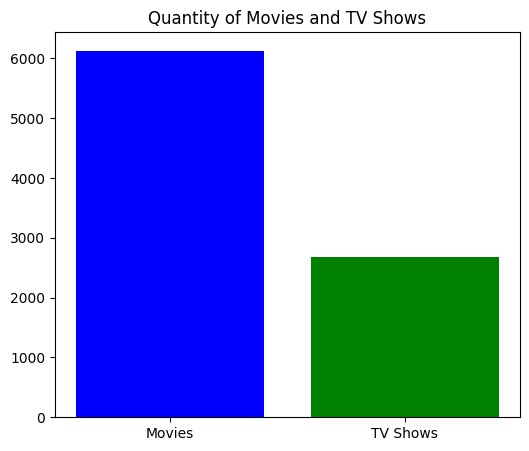

In [7]:
# separate the two types of content
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']

# create bar graph to get the quantity of each
plt.figure(figsize=(6, 5))
plt.bar(['Movies', 'TV Shows'], [len(movies), len(tv_shows)], color=['b', 'g'])
plt.title('Quantity of Movies and TV Shows')

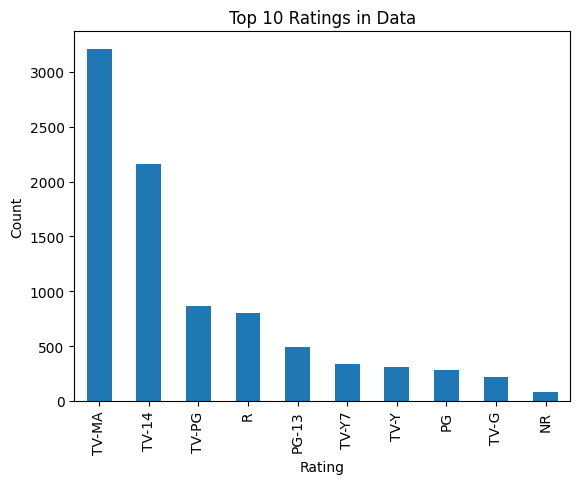

In [8]:
# Get the most common ratings
top_10_ratings = data['rating'].value_counts().head(10)

# Visualize the results
top_10_ratings.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Top 10 Ratings in Data')
plt.show()

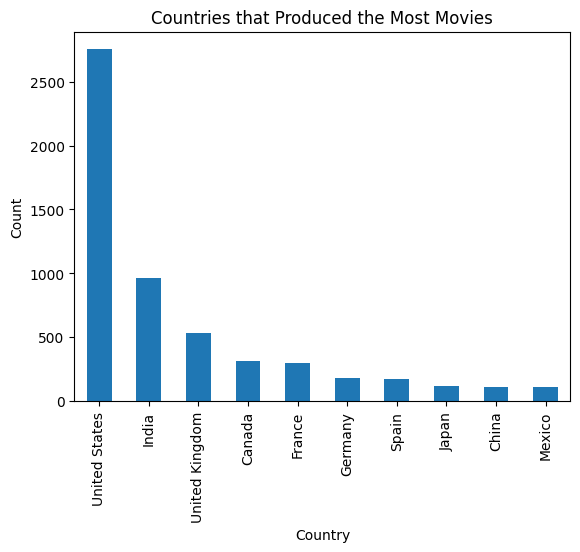

In [9]:
# Preprocess the country column and handle multiple countries
movies['country_process'] = movies['country'].str.split(',')

# Flatten the list of countries into a single Series
all_countries = movies.explode('country_process')['country_process'].str.strip()

# Plot the modified data
all_countries.value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Countries that Produced the Most Movies')
plt.show()


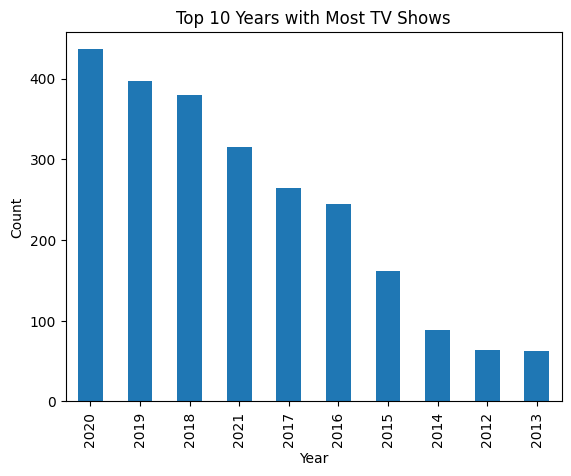

In [10]:
# Check the years that most tv shows were produced (top 10)
top_10_years = tv_shows['release_year'].value_counts().head(10)
top_10_years.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 10 Years with Most TV Shows')
plt.show()


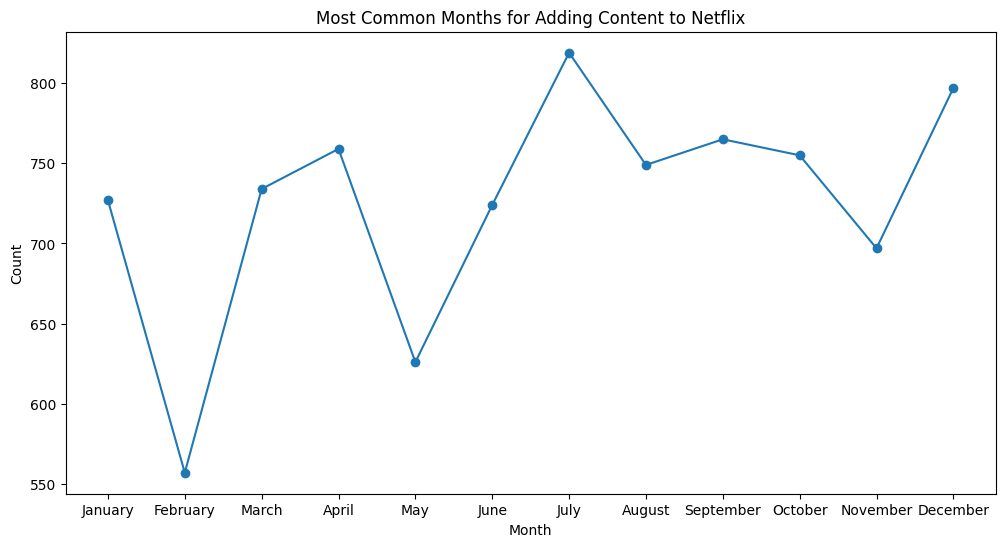

In [11]:
# Analyse the months where is most common to add content to netflix

# Preprocess the date added column
month = data['date_added'].dropna().str.split(' ').str[0]
vals_per_month = month.value_counts()

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
vals_order = [vals_per_month.loc[i] for i in order]

plt.figure(figsize=(12, 6))
plt.plot(order, vals_order, marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Most Common Months for Adding Content to Netflix')
plt.show()

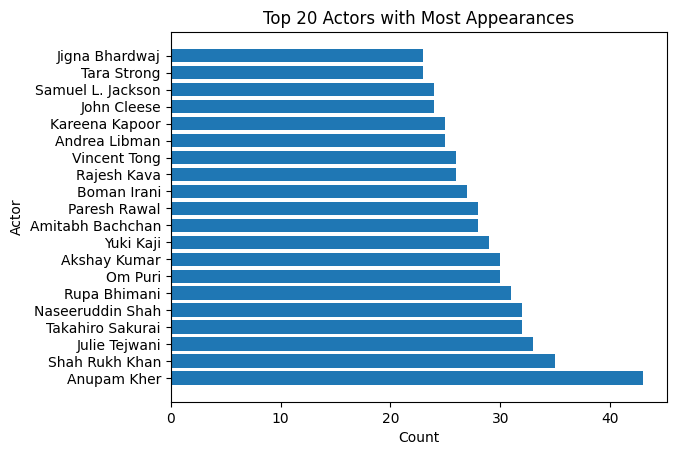

In [12]:
# Get the actors that appear in the most content

# preprocess the cast column
actors_process = data['cast'].str.split(',').dropna()

# get all actors and their counts
acts_all = actors_process.explode().str.strip().value_counts()

# create a dataframe for the top 20 actors
top_20_actors = acts_all.head(20).reset_index()
top_20_actors.columns = ['actor', 'count']

# plot the top 20 actors
plt.barh(top_20_actors['actor'], top_20_actors['count'])
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Top 20 Actors with Most Appearances')
plt.show()


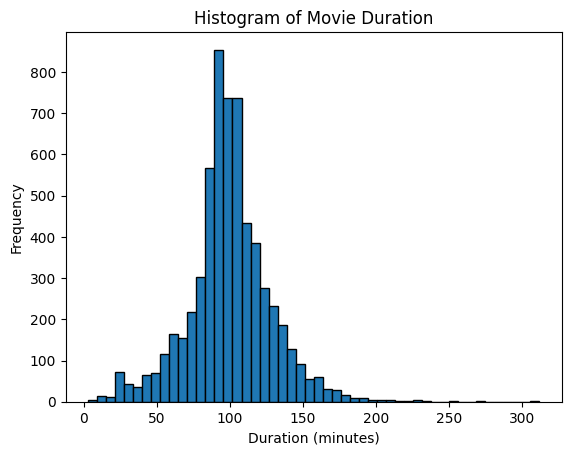

In [13]:
# Histogram for moving duration time
# preprocess the duration column
duration_movies = movies['duration'].str.split(' ').str[0]

# convert the duration_movies series to numeric
duration_movies = pd.to_numeric(duration_movies)

# create a histogram
plt.hist(duration_movies, bins=50, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Duration')
plt.show()


In [14]:
# Most common genre 'listed in' content by year (3 most common in each year)
unique_years = data['release_year'].unique().tolist()

# Choose 3 random years out of all of them
years_r = random.sample(unique_years, 3)

for year in years_r:
    genres_year = data[data['release_year'] == year]['listed_in'].str.split(', ').explode()
    most_common_three = genres_year.value_counts().head(3)
    
    print(f'The 3 most common genres in {year} were:')
    for genre, count in most_common_three.items():
        print(f' - {genre} with {count} appearances')

    print('\n')


The 3 most common genres in 2013 were:
 - International Movies with 121 appearances
 - Dramas with 83 appearances
 - Comedies with 65 appearances


The 3 most common genres in 1974 were:
 - Comedies with 4 appearances
 - Dramas with 3 appearances
 - International Movies with 2 appearances


The 3 most common genres in 1960 were:
 - Dramas with 3 appearances
 - Comedies with 2 appearances
 - International Movies with 2 appearances


